<h1 style="font-size:30px;">Image Histograms </h1>

Image histograms are primarily used as an analysis tool in computer vision as they quantify the distribution of data associated with an image (for example, intensity values within an image). In this notebook we will demonstrate how to produce image histograms and how to interpret the plots. We will also cover the topic of histogram equalization which can help improve the contrast in poorly illuminated images. As you will see, the results are often stunning.

In [1]:
if 'google.colab' in str(get_ipython()):
  !pip install matplotlib==3.5.2
  !pip install --upgrade opencv-contrib-python
  print("Downloading Code to Colab Environment")
  !wget https://www.dropbox.com/sh/s1bc9bnavqx9ryo/AABFVq9q_73nOcZ4T05k40rga?dl=1 -O module-code.zip -q --show-progress
  !unzip -qq module-code.zip
else:
    pass

In [2]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

In [3]:
# Check version of matplotlib, should be greter than or equal to 3.3.0. 
matplotlib.__version__

'3.5.2'

# 1. Introduction to Histograms

Histograms are collected counts of data organized into a set of predefined bins. When we plot histograms, we need to specify the number of bins along the x-axis. A bin represents a bucket range of values, such as pixel intensities 0-9, 10-19, 20-29, and so on. We will see several examples below that will help solidify this concept.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
retval = plt.hist(x[, bins[, range[, ...]]])
```

`retval`: Array or list of arrays, the values of the histogram bins. If input is a sequence of arrays [data1, data2, ...], then this is a list of arrays with the values of the histograms for each of the arrays in the same order. The dtype of the array n (or of its element arrays) will always be float even if no weighting or normalization is used.

The function has **1 required input argument** and several optional flags:

1. `x`: Array or sequence of (n,) arrays. Input values, this takes either a single array or a sequence of arrays which are not required to be of the same length.
2. `bins`: Defines the number of equal-width bins in the range. This is an **optional argument** with a default value of 10.
2. `range`: The lower and upper range of the bins, where lower and upper outliers are ignored. This is an **optional argument** with a default value of None, equivalent to using the whole range of the input `x`.


### <font color="green">OpenCV Documentation</font>

[**`histogram tutorial`**](https://docs.opencv.org/4.5.2/d8/dbc/tutorial_histogram_calculation.html)

### <font color="green">Matplotlib / Numpy Documentation</font>

[**`zeros()`**](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)
[**`ravel()`**](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
[**`hist()`**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Create a simple histogram of a black image</font>

Text(0.5, 1.0, 'Histogram of black image')

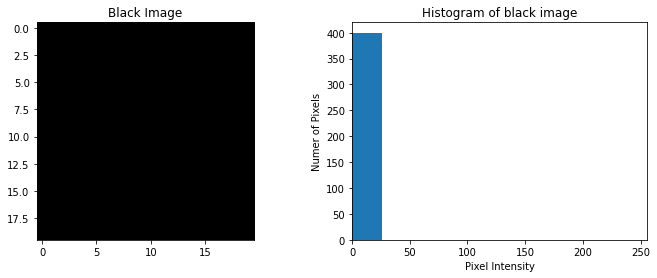

In [4]:
# Create a numpy array of 20x20x1 filled with zero values, equivalent to a black grayscale image.
black_img = np.zeros([20, 20, 1])

# Flatten the image data into a single 1D array.
black_flatten = black_img.ravel()

# Display the image and histogram.
plt.figure(figsize=[18, 4])

plt.subplot(131); plt.imshow(black_img); plt.title('Black Image')

plt.subplot(132) 
plt.hist(black_flatten, range = [0, 256])
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Numer of Pixels')
plt.title('Histogram of black image')

### <font style="color:rgb(50,120,230)">Explanation</font>

Using the numpy zeros function, we can easily generate a simple black image. It is technically a grayscale image with only one channel, including a total of 400 pixels. We then create a histogram of this image using the default number of bins (10), and we specify that the histogram should create these bins evenly across intensity values from 0 to 256. The upper end of this range is non inclusive, and so the histogram could ultimately show any pixel intensities up to and including a value of 255.

The histogram's vertical bars represent the total number of pixels with an intensity value that falls within that particular bin. Looking at the resulting histogram of a purely black image, we find that all values mapped into the first bin. We can also see that the total number of pixels (400) exactly equals the y-value pixel count in this first bin, related back to the 20x20 image size we generated.

### <font style="color:rgb(50,120,230)">Create a histogram from a binary image</font>

In [5]:
path = './starter_file/'

Text(0.5, 1.0, '50 Bins')

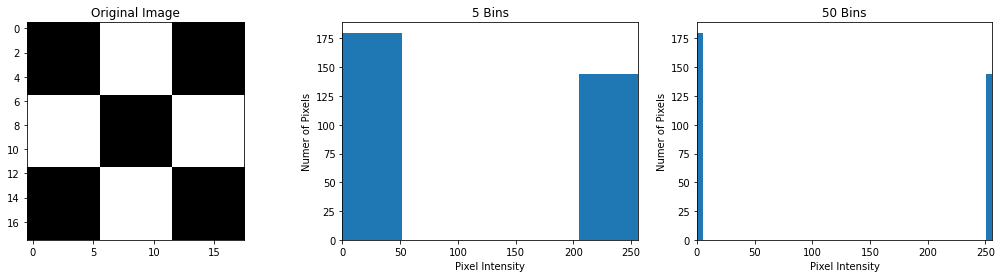

In [6]:
# Read the image.
img = cv2.imread(path + 'checkerboard_18x18.png', cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D array.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize = [18, 4])

plt.subplot(131); plt.imshow(img); plt.title('Original Image')

plt.subplot(132) 
plt.hist(img_flatten, 5, [0, 256])
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Numer of Pixels')
plt.title('5 Bins')

plt.subplot(133)
plt.hist(img_flatten, 50, [0, 256])
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Numer of Pixels')
plt.title('50 Bins')

### <font style="color:rgb(50,120,230)">Explanation</font>

The checkerboard image above is 18x18 pixels, so the total number of pixels in the image is 324. Furthermore, the intensities of the pixels are only 0 (black) or 255 (white). The histogram plots to the right show the distribution of pixel intensities. When we plot histograms, it is helpful to specify the number of bins along the x-axis. The first histogram has 5 bins and the second histogram has 50 bins. Since we are plotting the distribution of pixel intensities the x-axis ranges from 0 to 255. Thus, the bin width in the first plot is 51 and the bin width in the second plot is 5.1 (a non-integer width).

In this example, the height of the bar to the left of each plot is 180. This means that there are 180 pixels with intensities that in that corresponding bin. Since the intensities in this image are either 0 or 255, the width of the bin (5.1 or 51) does not matter because both bins include the value of 0. Likewise, the total number of white pixels (144) matches the height of the bar to the right of the plot (144) in both plots because both bins at the high range include the intensity value of 255.

The histograms reveal that the ratio of black to white squares is 5:4 (or 180:144). It's worth emphasizing that histograms of this type do not contain any spatial information about the image.

Selecting a particular bin size has to do with granularity, but for images it is very common to set the number of bins to be 256 which is equivalent to a bin width of 1.

### <font style="color:rgb(50,120,230)">Create a histogram from a grayscale image (example 1)</font>

Text(0.5, 1.0, '50 Bins')

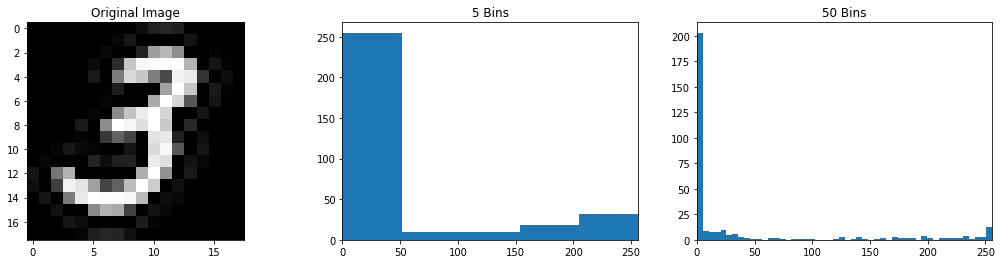

In [7]:
# Read the image.
img = cv2.imread(path + 'MNIST_3_18x18.png', cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D array.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize = [18, 4])

plt.subplot(131); plt.imshow(img); plt.title('Original Image')
plt.subplot(132); plt.hist(img_flatten, 5, [0, 256]);  plt.xlim([0, 256]); plt.title('5 Bins')
plt.subplot(133); plt.hist(img_flatten, 50, [0, 256]); plt.xlim([0, 256]); plt.title('50 Bins')

### <font style="color:rgb(50,120,230)">Create a histogram from a grayscale image (example 2)</font>

Text(0.5, 1.0, '256 Bins')

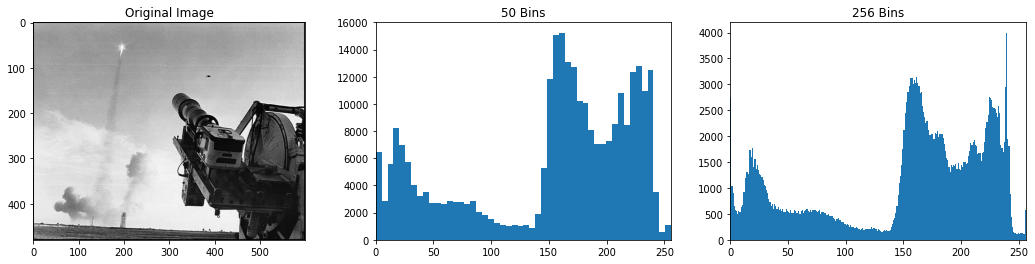

In [8]:
# Read the image.
img = cv2.imread(path + 'Apollo-8-Launch.jpg', cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D array.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize = [18, 4])
plt.subplot(131); plt.imshow(img); plt.title('Original Image')
plt.subplot(132); plt.hist(img_flatten, 50, [0,256]);  plt.xlim([0, 256]); plt.title('50 Bins')
plt.subplot(133); plt.hist(img_flatten, 256, [0,256]); plt.xlim([0, 256]); plt.title('256 Bins')

### <font style="color:rgb(50,120,230)">Compare calcHist() with plt.hist()</font>


<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>

```python
    hist = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
```

This function has **5 required arguments**:

1. `images`:	Source arrays. They all should have the same depth, CV_8U, CV_16U or CV_32F , and the same size. Each of them can have an arbitrary number of channels.

2. `channels`:	List of the dims channels used to compute the histogram. The first array channels are numerated from 0 to images[0].channels()-1 , the second array channels are counted from images[0].channels() to images[0].channels() + images[1].channels()-1, and so on.

3. `mask`:	Optional mask. If the matrix is not empty, it must be an 8-bit array of the same size as images[i] . The non-zero mask elements mark the array elements counted in the histogram.

4. `histSize`:	Array of histogram sizes in each dimension.

5. `ranges`:	Array of the dims arrays of the histogram bin boundaries in each dimension. 
### <font color="green">OpenCV Documentation</font>


[**`calcHist()`**](https://docs.opencv.org/4.5.2/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'np.ravel(), plt.hist()')

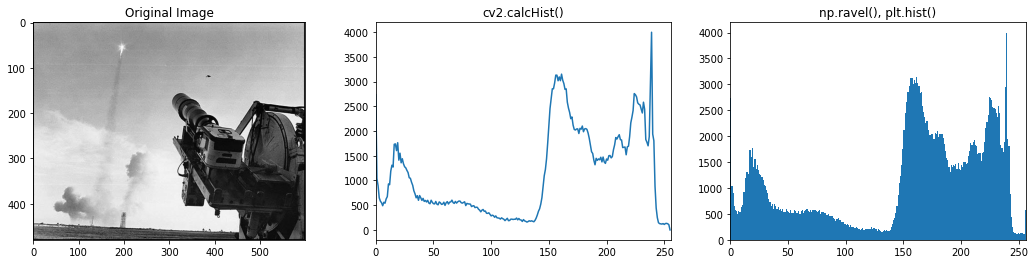

In [9]:
# Read the image.
img = cv2.imread(path + 'Apollo-8-Launch.jpg', 0)

# Use calcHist() in OpenCV.
hist = cv2.calcHist(images = [img], channels = [0], mask = None, histSize = [256], ranges = [0,255])

# Flatten the image data.
img_flatten = img.ravel()

# Display the image and histograms.
plt.figure(figsize = [18, 4])
plt.subplot(131); plt.imshow(img); plt.title('Original Image')
plt.subplot(132); plt.plot(hist); plt.xlim([0, 256]); plt.title('cv2.calcHist()')
plt.subplot(133); plt.hist(img_flatten,256,[0,256]); plt.xlim([0, 256]); plt.title('np.ravel(), plt.hist()')

### <font style="color:rgb(50,120,230)">Different images with identical histograms</font>

Text(0.5, 1.0, 'Histogram of noisy image')

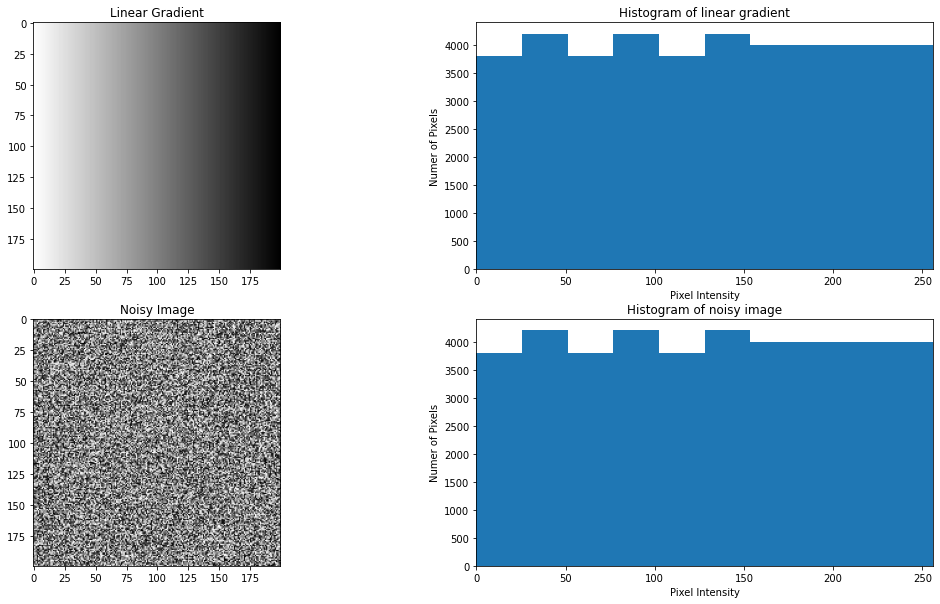

In [10]:
# Load in the two gradient images.
img_gradient = cv2.imread(path + 'linear_graident.png', cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread(path + 'noisy.png', cv2.IMREAD_GRAYSCALE)

# Flatten the image data into a single 1D arrays.
gradient_flatten = img_gradient.ravel()
noisy_flatten = img_noisy.ravel()

# Display the images and histograms.
plt.figure(figsize = [18, 10])

plt.subplot(221); plt.imshow(img_gradient); plt.title('Linear Gradient')

plt.subplot(222) 
plt.hist(gradient_flatten, range = [0, 256])
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Numer of Pixels')
plt.title('Histogram of linear gradient');

plt.subplot(223); plt.imshow(img_noisy); plt.title('Noisy Image')

plt.subplot(224) 
plt.hist(noisy_flatten, range = [0, 256])
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Numer of Pixels')
plt.title('Histogram of noisy image')

### <font style="color:rgb(50,120,230)">Explanation</font>

It is important to understand what histograms can and cannot tell us. In two very different images actually have identical histograms, with an approximately even distrubution of pixels in each bin. Just because two images have identical histograms, it does not mean they are otherwise the same.

# 2. Color Histograms

(0.0, 200000.0)

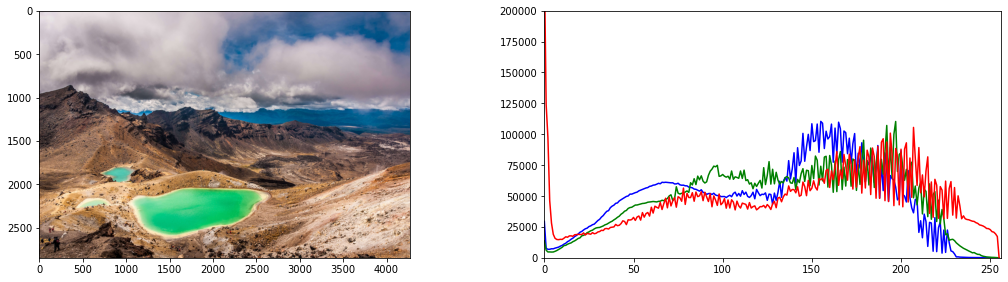

In [11]:
# Read the color images.
img = cv2.imread(path + 'Emerald_Lakes_New_Zealand.jpg')

# Compute histograms for each color channel for both images.
hist1 = cv2.calcHist([img], [0], None, [256], [0, 255])
hist2 = cv2.calcHist([img], [1], None, [256], [0, 255])
hist3 = cv2.calcHist([img], [2], None, [256], [0, 255])

# Display the images and histogram plots.
plt.figure(figsize = [18, 10])
plt.subplot(221); plt.imshow(img[:, :, ::-1])

plt.subplot(222) 
plt.plot(hist1, 'b'); plt.plot(hist2, 'g'); plt.plot(hist3, 'r') 
plt.xlim([0, 256])
plt.ylim([0, 200000])

### <font style="color:rgb(50,120,230)">Using a mask with calcHist()</font>

(0.0, 10000.0)

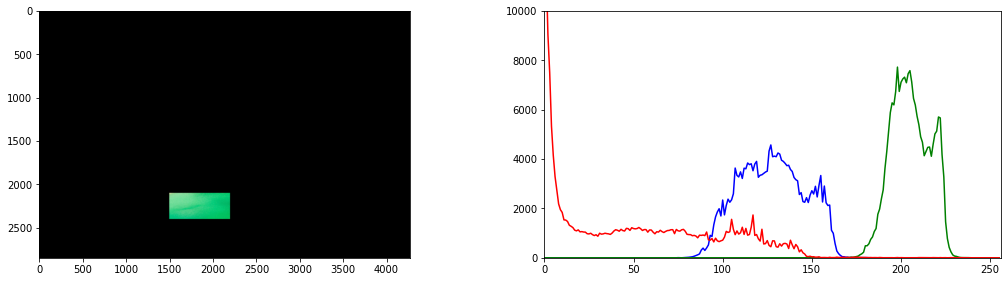

In [12]:
# Read the color images.
img = cv2.imread(path + 'Emerald_Lakes_New_Zealand.jpg')

# Create a mask to filter the image for the histogram calculation.
mask_hist = np.zeros((img.shape[0], img.shape[1]), dtype = 'uint8')

# Select a region that isolates the green lake.
mask_hist[2100:2400, 1500:2200] =  255

# Create a similar mask to show the selected region in the image (for display purposes only).
# The mask must have the same number of color channels as the image, but each color channel will
# contain the same information.
mat = [mask_hist, mask_hist, mask_hist]
mask_3ch = cv2.merge(mat, 3)

# Create an image that only shows the selected region of interest.
img_roi = cv2.bitwise_and(img, mask_3ch)

# Compute histograms for each color channel for both images.
hist1_lake = cv2.calcHist([img], [0], mask_hist, [256], [0, 255])
hist2_lake = cv2.calcHist([img], [1], mask_hist, [256], [0, 255])
hist3_lake = cv2.calcHist([img], [2], mask_hist, [256], [0, 255])

# Display the images and histogram plots.
plt.figure(figsize = [18, 10])
plt.subplot(223); plt.imshow(img_roi[:, :, ::-1])
plt.subplot(224); plt.plot(hist1_lake, 'b'); plt.plot(hist2_lake, 'g'); plt.plot(hist3_lake, 'r') 
plt.xlim([0, 256])
plt.ylim([0, 10000])

# 3. Histogram Equalization
An image histogram is a graphical representation of the tonal distribution of data. Each histogram is simply an array with 256 bins, and each bins contains the number of pixels with that intensity.
Histogram Equalization is a non-linear method for enhancing contrast in an image. Let's see how to perform histogram equalization in OpenCV using [**`equalizeHist()`**](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e). 

## 3.1 Histogram Equalization for Grayscale Images</font>

The function `equalizeHist()` performs histogram equalization on a grayscale image. The syntax is given below.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>

```python
	dst = cv2.equalizeHist(src[, dst])
```

**Parameters**

- **`src`**:	Source 8-bit single channel image.
- **`dst`**:	Destination image of the same size and type as src.

### <font color="green">OpenCV Documentation</font>


[**`equalizeHist()`**](https://docs.opencv.org/4.1.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'Original Image')

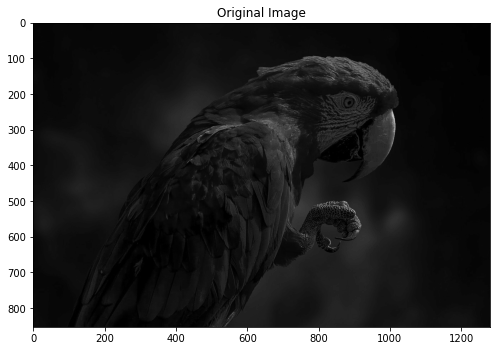

In [13]:
# Read the image in grayscale format.
img = cv2.imread(path + 'parrot.jpg', cv2.IMREAD_GRAYSCALE)

# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img); plt.title('Original Image')


Text(0.5, 1.0, 'Equalized Histogram')

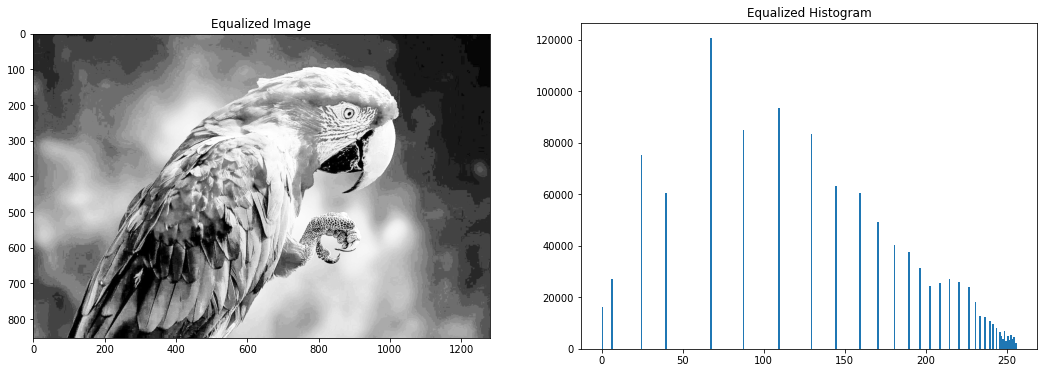

In [14]:
# Read the image in grayscale format.
img = cv2.imread(path + 'parrot.jpg', cv2.IMREAD_GRAYSCALE)

# Equalize histogram
img_eq = cv2.equalizeHist(img)

# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img_eq); plt.title('Equalized Image')
plt.subplot(122); plt.hist(img_eq.ravel(), 256, [0, 256]); plt.title('Equalized Histogram')

As expected, the histogram is spread more uniformly over the range 

## 3.2 Histogram Equalization for Color Images</font>

For color images, we can not simply apply histogram equalization on the R, G, B channels separately. To understand why it is not a very good idea, let's take a look at an example.

### <font style="color:rgb(50,120,230)">Wrong Way</font>

Text(0.5, 1.0, 'Equalized Image')

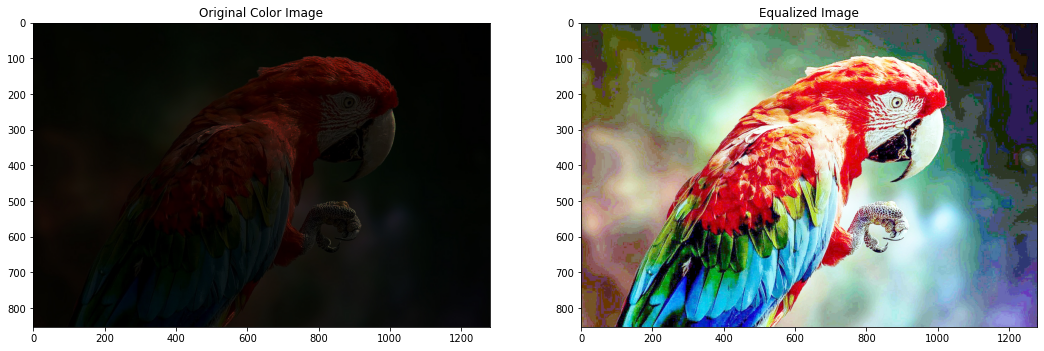

In [15]:
# Read color image
img = cv2.imread(path + 'parrot.jpg')
img_eq = np.zeros_like(img)

# Peform histogram equalization on each channel separately.
for i in range(0, 3):
    img_eq[:, :, i] = cv2.equalizeHist(img[:, :, i])

# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Original Color Image')
plt.subplot(122); plt.imshow(img_eq[:, :, ::-1]); plt.title('Equalized Image')

### <font style="color:rgb(50,120,230)">Right Way</font>

We just saw that histogram equalization performed on the three channels separately leads to poor results. The reason is that when each color channel is non-linearly transformed independently, you can get completely new and unrelated colors. 

The right way to perform histogram equalization on color images is to transform the images to a space like the **HSV** colorspace where colors/hue/tint is separated from the intensity. 

**WORKFLOW**

1. Tranform the image to HSV colorspace.
2. Perform histogram equalization only on the V channel. 
3. Transform the image back to RGB colorspace.

Text(0.5, 1.0, 'Equalized Image')

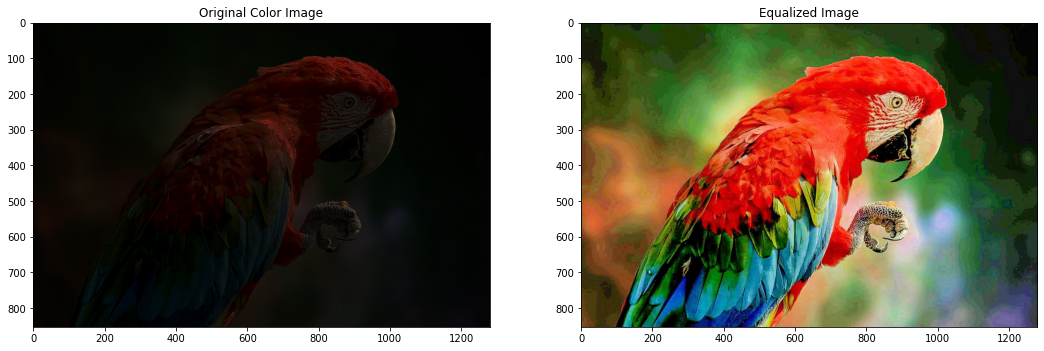

In [16]:
# Read the color image.
img = cv2.imread(path + 'parrot.jpg', cv2.IMREAD_COLOR)

# Convert to HSV.
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Perform histogram equalization only on the V channel, for value intensity.
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:, :, 2])

# Convert back to BGR format.
img_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

# Display the images.
plt.figure(figsize = (18, 6))
plt.subplot(121); plt.imshow(img[:, :, ::-1]); plt.title('Original Color Image')
plt.subplot(122); plt.imshow(img_eq[:, :, ::-1]); plt.title('Equalized Image')

Text(0.5, 1.0, 'Histogram Equalized')

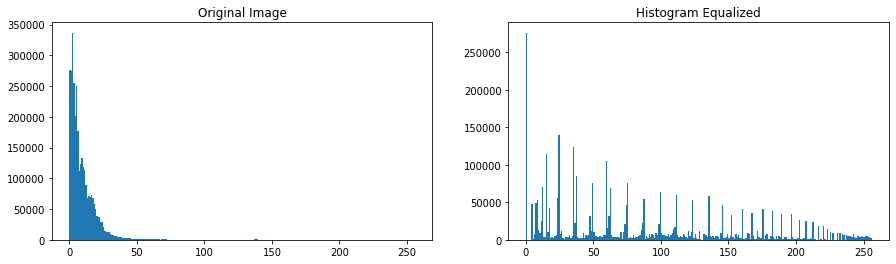

In [17]:
# Display the histograms.
plt.figure(figsize = [15,4])
plt.subplot(121); plt.hist(img.ravel(),256,[0,256]); plt.title('Original Image')
plt.subplot(122); plt.hist(img_eq.ravel(),256,[0,256]); plt.title('Histogram Equalized')